In [2]:
#!pip list
# #pip install pandas
# pip install matplotlib
# pip install ipywidgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

In [3]:
# Load the CSV file into a dataframe
df = pd.read_csv('/Users/nagendra_subramanya@optum.com/Library/CloudStorage/OneDrive-Krishna/Nagendra/SelfCode/DatabaseInCSV/DailyLogSummaryForEachDay.csv')

# Display the first few rows of the dataframe
print(df.sort_values(by='ActivityDate', ascending=False).head())

              Category   ActivityDate  TotalValue
1762          SelfTech  31/12/24 0:00        0.00
1761          SelfCode  31/12/24 0:00        0.00
1760          SelfHelp  31/12/24 0:00        1.25
1763          SelfSong  31/12/24 0:00        0.00
1764  FitbitDailySteps  31/12/24 0:00    15463.00


In [4]:
# Group by 'Category' and calculate the required statistics
stats_by_category = df.groupby('Category').agg(
    TotalSum=('TotalValue', 'sum'),
    TotalCount=('TotalValue', 'count'),
    Average=('TotalValue', 'mean'),
    Median=('TotalValue', 'median')
).reset_index()

# Round the numerical columns to 2 decimal places
stats_by_category[['TotalSum', 'Average', 'Median']] = stats_by_category[['TotalSum', 'Average', 'Median']].round(2)

# Calculate zero and non-zero entries grouped by 'Category'
zero_scores = df[df['TotalValue'] == 0].groupby('Category').size().reset_index(name='Zeros')
non_zero_scores = df[df['TotalValue'] != 0].groupby('Category').size().reset_index(name='NonZeros')

# Merge zero and non-zero scores with the main stats dataframe
stats_by_category = stats_by_category.merge(zero_scores, on='Category', how='left').merge(non_zero_scores, on='Category', how='left')

# Fill NaN values with 0 for ZeroScores and NonZeroScores
stats_by_category[['Zeros', 'NonZeros']] = stats_by_category[['Zeros', 'NonZeros']].fillna(0).astype(int)

# Calculate zero and non-zero percentages
stats_by_category['ZeroP'] = ((stats_by_category['Zeros'] / stats_by_category['TotalCount']) * 100).round(2)
stats_by_category['NonZeroP'] = ((stats_by_category['NonZeros'] / stats_by_category['TotalCount']) * 100).round(2)

# Display the result
# Use the to_string() method to print the entire dataframe in a single table with all columns in one line
print(stats_by_category.to_string(index=False))



        Category   TotalSum  TotalCount  Average  Median  Zeros  NonZeros  ZeroP  NonZeroP
FitbitDailySteps 36181423.0        3492 10361.23 10383.0     82      3410   2.35     97.65
        SelfCode      328.5        2276     0.14     0.0   1718       558  75.48     24.52
        SelfHelp     1118.0        2276     0.49     0.5    916      1360  40.25     59.75
        SelfSong      134.5        2276     0.06     0.0   1876       400  82.43     17.57
        SelfTech      632.0        2276     0.28     0.0   1393       883  61.20     38.80


In [5]:
df.groupby('Category').describe()

TotalValue                                                   \
                      count          mean          std  min     25%      50%   
Category                                                                       
FitbitDailySteps     3492.0  10361.232245  5704.158105  0.0  6118.0  10383.0   
SelfCode             2276.0      0.144332     0.357701  0.0     0.0      0.0   
SelfHelp             2276.0      0.491213     0.542258  0.0     0.0      0.5   
SelfSong             2276.0      0.059095     0.140723  0.0     0.0      0.0   
SelfTech             2276.0      0.277680     0.443639  0.0     0.0      0.0   

                                      
                       75%       max  
Category                              
FitbitDailySteps  14156.25  40645.00  
SelfCode              0.00      6.50  
SelfHelp              0.75      4.25  
SelfSong              0.00      1.00  
SelfTech              0.50      3.50

In [6]:
# Convert ActivityDate to datetime format
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

# Extract year, quarter, month, and week from ActivityDate
df['Year'] = df['ActivityDate'].dt.year
df['Quarter'] = df['ActivityDate'].dt.to_period('Q').astype(str)
df['Month'] = df['ActivityDate'].dt.strftime('%Y-%m-%b')
df['Week'] = df['ActivityDate'].dt.strftime('%Y-Week%U')

# Group by Category and Year, Quarter, Month, Week to calculate the average TotalValue
yearly_avg = df.groupby(['Category', 'Year'])['TotalValue'].mean().reset_index()
quarterly_avg = df.groupby(['Category', 'Quarter'])['TotalValue'].mean().reset_index()
monthly_avg = df.groupby(['Category', 'Month'])['TotalValue'].mean().reset_index()
weekly_avg = df.groupby(['Category', 'Week'])['TotalValue'].mean().reset_index()

# Find the best year, quarter, month, and week for each category
best_year = yearly_avg.loc[yearly_avg.groupby('Category')['TotalValue'].idxmax(), ['Category', 'Year']]
best_quarter = quarterly_avg.loc[quarterly_avg.groupby('Category')['TotalValue'].idxmax(), ['Category', 'Quarter']]
best_month = monthly_avg.loc[monthly_avg.groupby('Category')['TotalValue'].idxmax(), ['Category', 'Month']]
best_week = weekly_avg.loc[weekly_avg.groupby('Category')['TotalValue'].idxmax(), ['Category', 'Week']]

# Merge the results into a single dataframe
best_stats = best_year.merge(best_quarter, on='Category').merge(best_month, on='Category').merge(best_week, on='Category')
# Rename columns for clarity
best_stats.columns = ['Category', 'BestYear', 'BestQuarter', 'BestMonth', 'BestWeek']

# Display the result
print(best_stats.to_string(index=False))

        Category  BestYear BestQuarter   BestMonth    BestWeek
FitbitDailySteps      2021      2021Q3 2021-09-Sep 2021-Week30
        SelfCode      2025      2024Q3 2020-08-Aug 2020-Week33
        SelfHelp      2022      2022Q2 2019-05-May 2023-Week53
        SelfSong      2025      2025Q4 2025-11-Nov 2025-Week45
        SelfTech      2023      2023Q4 2023-10-Oct 2020-Week33


/var/folders/59/35nd85z13ynb37313bsq35v00000gp/T/ipykernel_23841/702705959.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])


In [28]:

# Group by Category and Year, Quarter, Month, Week to calculate the average TotalValue
yearly_sum = df.groupby(['Category', 'Year'])['TotalValue'].sum().reset_index()
quarterly_sum = df.groupby(['Category', 'Quarter'])['TotalValue'].sum().reset_index()
monthly_sum = df.groupby(['Category', 'Month'])['TotalValue'].sum().reset_index()
weekly_sum = df.groupby(['Category', 'Week'])['TotalValue'].sum().reset_index()



In [32]:
best_year_sum = yearly_sum.loc[yearly_sum.groupby('Category')['TotalValue'].idxmax(), ['Category', 'Year','TotalValue']]
print(best_year_sum.to_string(index=False))

        Category  Year  TotalValue
FitbitDailySteps  2021  4672838.00
        SelfCode  2025       92.00
        SelfHelp  2022      236.75
        SelfSong  2025       52.25
        SelfTech  2023      156.25


In [ ]:
# Sort the dataframe by ActivityDate in ascending order and display the first 10 rows
print(df.sort_values(by='ActivityDate', ascending=False).head(10))


           Category ActivityDate  TotalValue  Year Quarter        Month  \
0          SelfHelp   2025-12-18        0.00  2025  2025Q4  2025-12-Dec   
2          SelfTech   2025-12-18        0.00  2025  2025Q4  2025-12-Dec   
3          SelfSong   2025-12-18        0.00  2025  2025Q4  2025-12-Dec   
4  FitbitDailySteps   2025-12-18        0.00  2025  2025Q4  2025-12-Dec   
1          SelfCode   2025-12-18        0.00  2025  2025Q4  2025-12-Dec   
5          SelfHelp   2025-12-17        0.75  2025  2025Q4  2025-12-Dec   
6          SelfCode   2025-12-17        0.25  2025  2025Q4  2025-12-Dec   
7          SelfTech   2025-12-17        1.50  2025  2025Q4  2025-12-Dec   
8          SelfSong   2025-12-17        0.25  2025  2025Q4  2025-12-Dec   
9  FitbitDailySteps   2025-12-17    14479.00  2025  2025Q4  2025-12-Dec   

          Week  NonZero  
0  2025-Week50    False  
2  2025-Week50    False  
3  2025-Week50    False  
4  2025-Week50    False  
1  2025-Week50    False  
5  2025-Week50    

In [9]:
best_month_sum = monthly_sum.loc[monthly_sum.groupby('Category')['TotalValue'].idxmax()]
print(best_month_sum)

             Category        Month  TotalValue
68   FitbitDailySteps  2021-09-Sep   461387.00
139          SelfCode  2020-08-Aug       19.75
243          SelfHelp  2022-04-Apr       29.75
370          SelfSong  2025-11-Nov        9.00
429          SelfTech  2023-10-Oct       18.75


In [10]:
best_week_sum = weekly_sum.loc[weekly_sum.groupby('Category')['TotalValue'].idxmax()]
print(best_week_sum)

              Category         Week  TotalValue
283   FitbitDailySteps  2021-Week30   131050.00
573           SelfCode  2020-Week33       11.25
914           SelfHelp  2020-Week34       10.00
1530          SelfSong  2025-Week45        3.00
1593          SelfTech  2020-Week33       10.00


In [11]:

# the yearlyy_avg has Category year and totalvalue , i want to plot the horizontal bar. the y axis will have year the horizonal bar will show length of total value. 
# i want the total value 
# to be shown on horizontal bar upto two decimal places make sure all the graph comes in single horizontal right next to each other one another

In [12]:
yearly_avg_sorted = yearly_avg.sort_values(by='Year', ascending=False)
yearly_avg_sorted


,Category,Year,TotalValue
37,SelfTech,2025,0.392045
23,SelfHelp,2025,0.566051
16,SelfCode,2025,0.261364
30,SelfSong,2025,0.148438
9,FitbitDailySteps,2025,12182.204545
8,FitbitDailySteps,2024,10333.136612
15,SelfCode,2024,0.165984
22,SelfHelp,2024,0.544399
29,SelfSong,2024,0.133197
36,SelfTech,2024,0.355191


In [13]:
monthly_avg

,Category,Month,TotalValue
0,FitbitDailySteps,2016-01-Jan,11771.142857
1,FitbitDailySteps,2016-02-Feb,8543.571429
2,FitbitDailySteps,2016-03-Mar,10743.857143
3,FitbitDailySteps,2016-04-Apr,11741.428571
4,FitbitDailySteps,2016-05-May,10989.818182
...,...,...,...
451,SelfTech,2025-08-Aug,0.250000
452,SelfTech,2025-09-Sep,0.558333
453,SelfTech,2025-10-Oct,0.411290
454,SelfTech,2025-11-Nov,0.416667


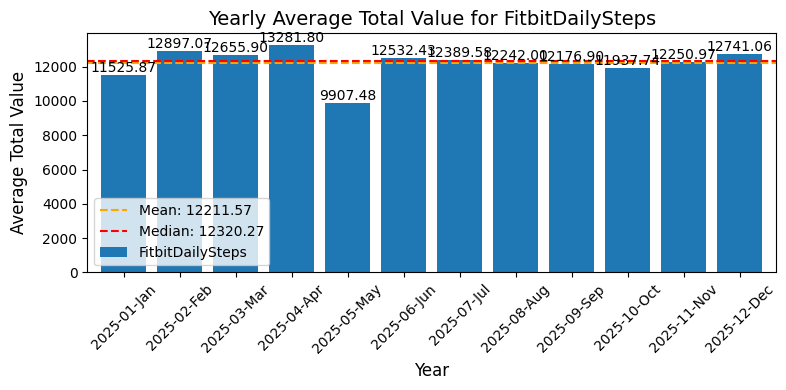

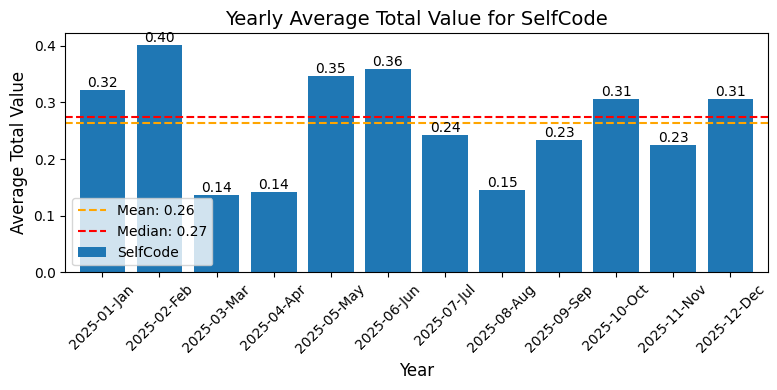

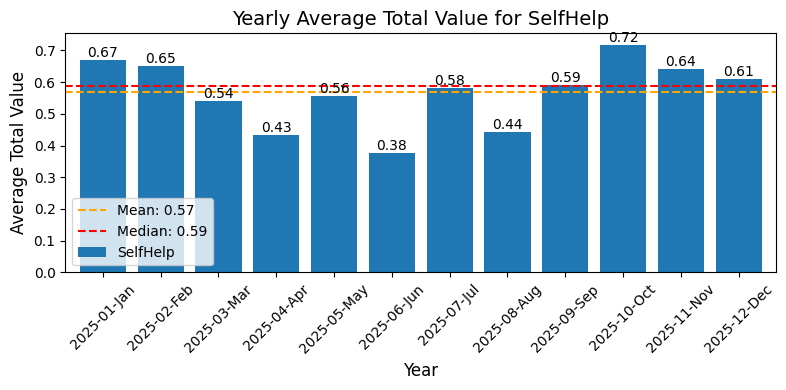

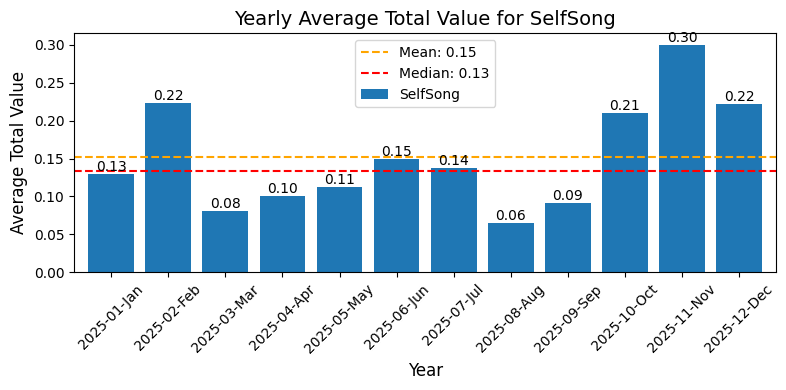

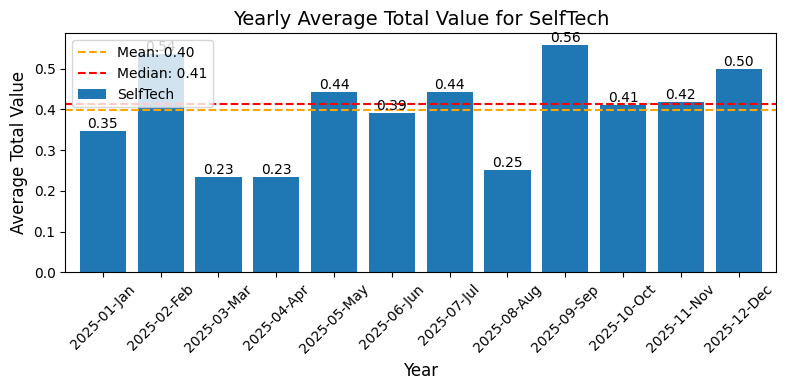

In [14]:
pivot_data = yearly_avg.pivot(index='Year', columns='Category', values='TotalValue')
# Filter monthly_avg for the current year
current_year = pd.Timestamp.now().year
monthly_avg_current_year = monthly_avg[monthly_avg['Month'].str.startswith(str(current_year))]

# Pivot the data for the current year
pivot_data = monthly_avg_current_year.pivot(index='Month', columns='Category', values='TotalValue')
# Iterate through each category and plot a separate graph
for category in pivot_data.columns:
    plt.figure(figsize=(8, 4))
    ax = pivot_data[category].dropna().plot(kind='bar', width=0.8)

    # Add labels and title
    plt.title(f'Yearly Average Total Value for {category}', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Total Value', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()

    # Calculate mean and median for the category
    mean_value = pivot_data[category].mean()
    median_value = pivot_data[category].median()

    # Plot mean as an orange dotted line
    plt.axhline(y=mean_value, color='orange', linestyle='--', linewidth=1.5, label=f'Mean: {mean_value:.2f}')

    # Plot median as a red dotted line
    plt.axhline(y=median_value, color='red', linestyle='--', linewidth=1.5, label=f'Median: {median_value:.2f}')

    # Annotate each bar with its value
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

    # Add legend
    plt.legend(fontsize=10)

    # Show the plot
    plt.show()


In [15]:
top_10_records = df.sort_values(by='ActivityDate', ascending=False).head(10)
top_10_records.sort_values(by=['ActivityDate','Category'], ascending=[False, True])

,Category,ActivityDate,TotalValue,Year,Quarter,Month,Week
4,FitbitDailySteps,2025-12-18,0.00,2025,2025Q4,2025-12-Dec,2025-Week50
1,SelfCode,2025-12-18,0.00,2025,2025Q4,2025-12-Dec,2025-Week50
0,SelfHelp,2025-12-18,0.00,2025,2025Q4,2025-12-Dec,2025-Week50
3,SelfSong,2025-12-18,0.00,2025,2025Q4,2025-12-Dec,2025-Week50
2,SelfTech,2025-12-18,0.00,2025,2025Q4,2025-12-Dec,2025-Week50
9,FitbitDailySteps,2025-12-17,14479.00,2025,2025Q4,2025-12-Dec,2025-Week50
6,SelfCode,2025-12-17,0.25,2025,2025Q4,2025-12-Dec,2025-Week50
5,SelfHelp,2025-12-17,0.75,2025,2025Q4,2025-12-Dec,2025-Week50
8,SelfSong,2025-12-17,0.25,2025,2025Q4,2025-12-Dec,2025-Week50
7,SelfTech,2025-12-17,1.50,2025,2025Q4,2025-12-Dec,2025-Week50


/var/folders/59/35nd85z13ynb37313bsq35v00000gp/T/ipykernel_23841/3127839748.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  last_12_weeks = weekly_sum.groupby('Category').apply(lambda x: x.tail(12)).reset_index(drop=True)


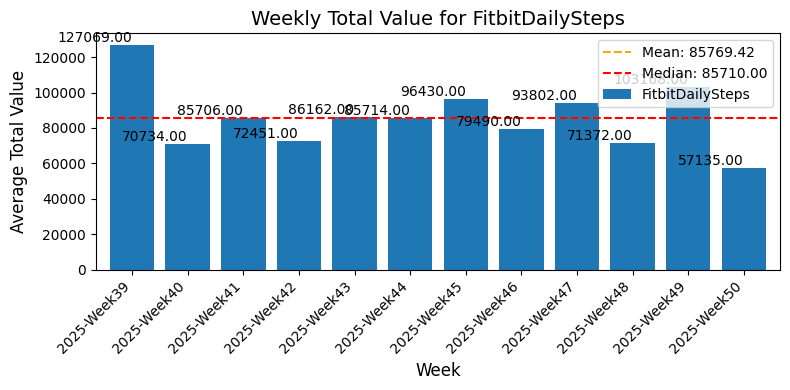

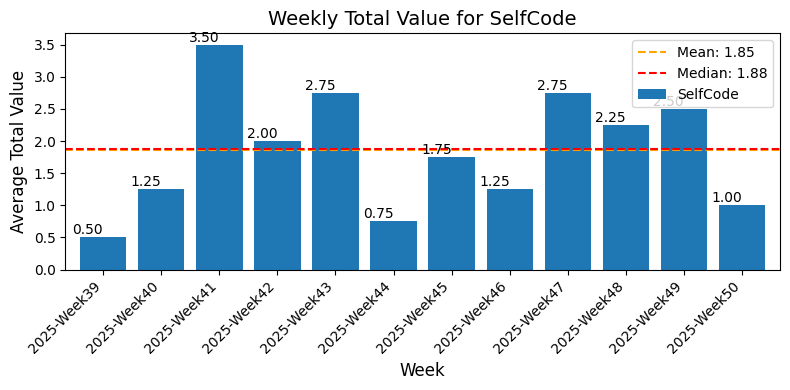

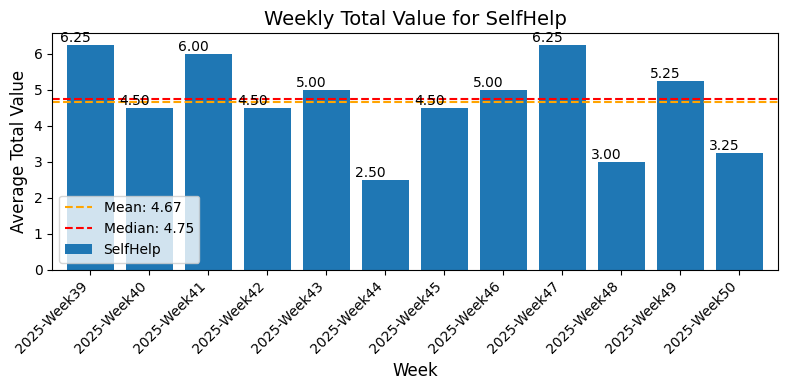

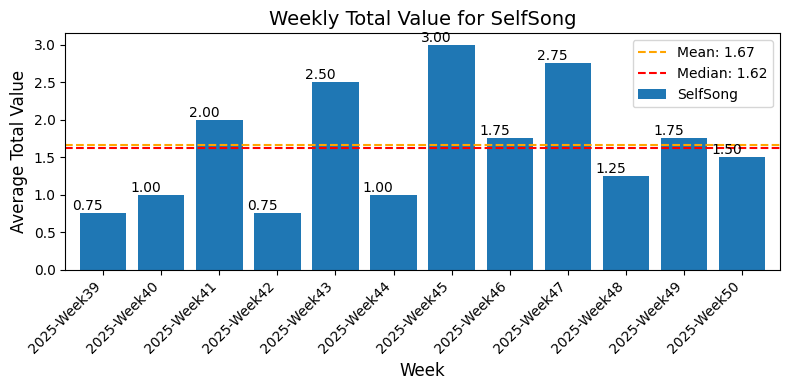

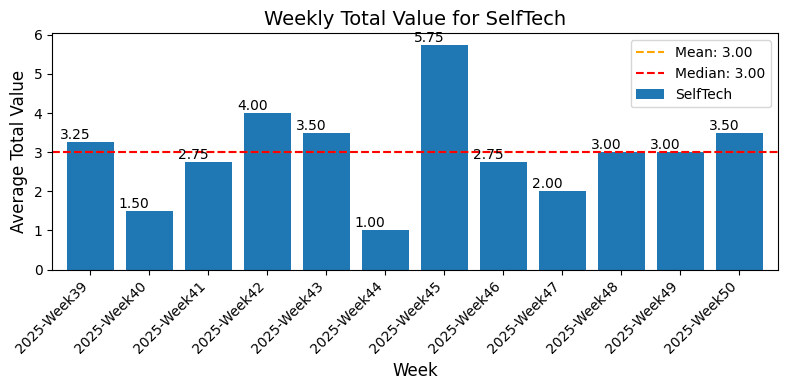

In [16]:
# Take the last 12 weeks data from weekly_avg
last_12_weeks = weekly_sum.groupby('Category').apply(lambda x: x.tail(12)).reset_index(drop=True)
last_12_weeks
# Pivot the data for the last 12 weeks
pivot_data = last_12_weeks.pivot(index='Week', columns='Category', values='TotalValue')


# Iterate through each category and plot a separate graph
for category in pivot_data.columns:
    plt.figure(figsize=(8, 4))
    ax = pivot_data[category].dropna().plot(kind='bar', width=0.8)

    # Add labels and title
    plt.title(f'Weekly Total Value for {category}', fontsize=14)
    plt.xlabel('Week', fontsize=12)
    plt.ylabel('Average Total Value', fontsize=12)
    plt.xticks(rotation=45, fontsize=10, ha='right')
    plt.tight_layout()

    # Calculate mean and median for the category
    mean_value = pivot_data[category].mean()
    median_value = pivot_data[category].median()

    # Plot mean as an orange dotted line
    plt.axhline(y=mean_value, color='orange', linestyle='--', linewidth=1.5, label=f'Mean: {mean_value:.2f}')

    # Plot median as a red dotted line
    plt.axhline(y=median_value, color='red', linestyle='--', linewidth=1.5, label=f'Median: {median_value:.2f}')

    # Annotate each bar with its value
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='right', va='bottom', fontsize=10)

    # Add legend
    plt.legend(fontsize=10)

    # Show the plot
    plt.show()

In [17]:
pivot_data

Category,FitbitDailySteps,SelfCode,SelfHelp,SelfSong,SelfTech
Week,,,,,
2025-Week39,127069.0,0.50,6.25,0.75,3.25
2025-Week40,70734.0,1.25,4.50,1.00,1.50
2025-Week41,85706.0,3.50,6.00,2.00,2.75
2025-Week42,72451.0,2.00,4.50,0.75,4.00
2025-Week43,86162.0,2.75,5.00,2.50,3.50
2025-Week44,85714.0,0.75,2.50,1.00,1.00
2025-Week45,96430.0,1.75,4.50,3.00,5.75
2025-Week46,79490.0,1.25,5.00,1.75,2.75
2025-Week47,93802.0,2.75,6.25,2.75,2.00


In [18]:


# Create a function to plot the graph for a specific category
def plot_graph(category):
    clear_output(wait=True)  # Clear the output area
    plt.figure(figsize=(8, 4))
    ax = pivot_data[category].dropna().plot(kind='bar', width=0.8)

    # Add labels and title
    plt.title(f'Weekly Total Value for {category}', fontsize=14)
    plt.xlabel('Week', fontsize=12)
    plt.ylabel('Average Total Value', fontsize=12)
    plt.xticks(rotation=45, fontsize=10, ha='right')
    plt.tight_layout()

    # Calculate mean and median for the category
    mean_value = pivot_data[category].mean()
    median_value = pivot_data[category].median()

    # Plot mean as an orange dotted line
    plt.axhline(y=mean_value, color='orange', linestyle='--', linewidth=1.5, label=f'Mean: {mean_value:.2f}')

    # Plot median as a red dotted line
    plt.axhline(y=median_value, color='red', linestyle='--', linewidth=1.5, label=f'Median: {median_value:.2f}')

    # Annotate each bar with its value
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='right', va='bottom', fontsize=10)

    # Add legend
    plt.legend(fontsize=10)

    # Show the plot
    plt.show()
    display(button_box)

# Create buttons for each category
buttons = []
for category in pivot_data.columns:
    button = widgets.Button(description=category)
    buttons.append(button)

    # Attach an event handler to the button
    button.on_click(lambda b, cat=category: plot_graph(cat))

# Display the buttons
button_box = widgets.HBox(buttons)
display(button_box)

In [19]:
# df.to_parquet('parquet')
# df.to_pickle('pickle')

<Axes: xlabel='Category'>

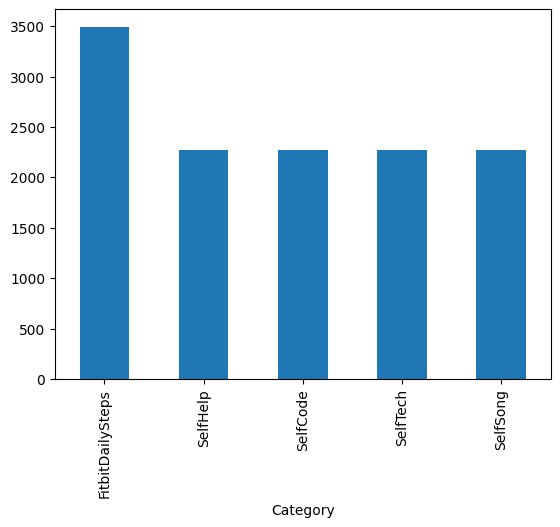

In [20]:
fig, ax = plt.subplots()
df['Category'].value_counts().plot(kind='bar')


### PIE Charts

In [21]:
df['NonZero'] = df['TotalValue'] != 0

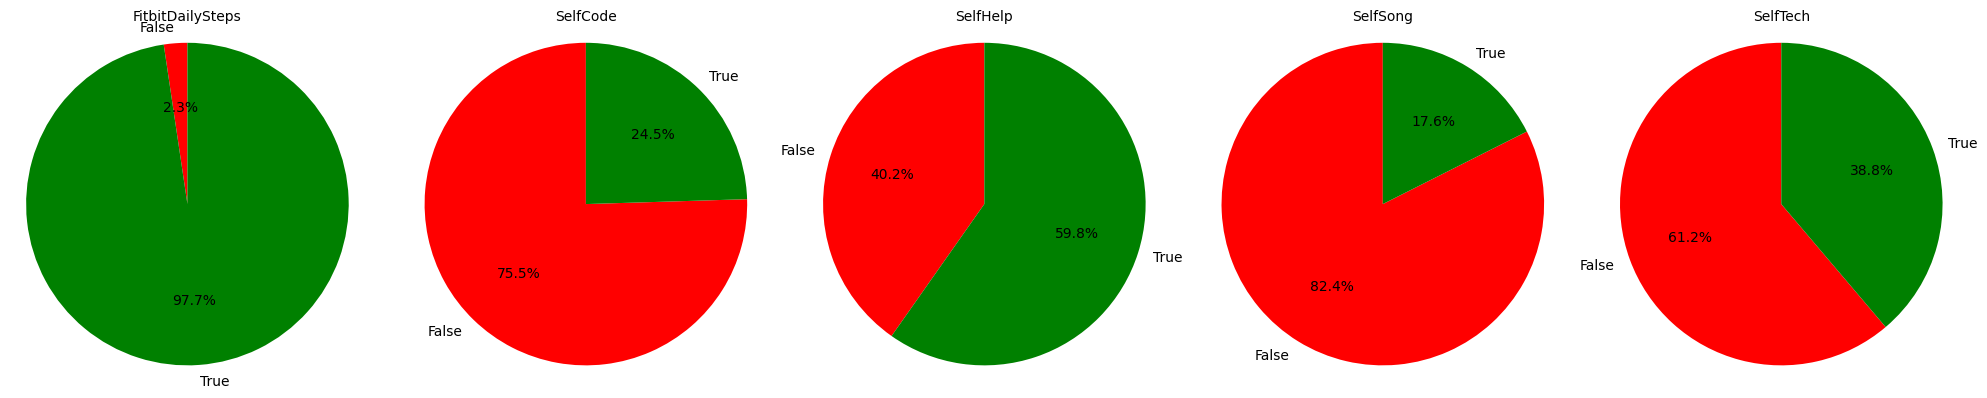

In [22]:
# pie chart examples good for boolean. https://www.youtube.com/watch?v=wUSDVGivd-8&t=30603s
# Group by Category and NonZero to calculate counts
nonzero_counts = df.groupby(['Category', 'NonZero']).size().unstack(fill_value=0)

# Set up the figure for compact pie charts
fig, axes = plt.subplots(1, len(nonzero_counts), figsize=(len(nonzero_counts) * 4, 4))

# Iterate through each category and plot a pie chart
for ax, category in zip(axes, nonzero_counts.index):
    values = nonzero_counts.loc[category]
    labels = ['False', 'True']
    colors = ['red', 'green']

    ax.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90) #autopct='%1.1f%%' shows percentage values on chart.
    ax.set_title(category, fontsize=10)
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Adjust layout to ensure charts fit in a single row
plt.tight_layout()
plt.show()

### plot points
### Adjust Text


In [23]:
df

,Category,ActivityDate,TotalValue,Year,Quarter,Month,Week,NonZero
0,SelfHelp,2025-12-18,0.0,2025,2025Q4,2025-12-Dec,2025-Week50,False
1,SelfCode,2025-12-18,0.0,2025,2025Q4,2025-12-Dec,2025-Week50,False
2,SelfTech,2025-12-18,0.0,2025,2025Q4,2025-12-Dec,2025-Week50,False
3,SelfSong,2025-12-18,0.0,2025,2025Q4,2025-12-Dec,2025-Week50,False
4,FitbitDailySteps,2025-12-18,0.0,2025,2025Q4,2025-12-Dec,2025-Week50,False
...,...,...,...,...,...,...,...,...
12591,FitbitDailySteps,2016-01-06,14939.0,2016,2016Q1,2016-01-Jan,2016-Week01,True
12592,FitbitDailySteps,2016-05-31,18193.0,2016,2016Q2,2016-05-May,2016-Week22,True
12593,FitbitDailySteps,2016-05-30,18227.0,2016,2016Q2,2016-05-May,2016-Week22,True
12594,FitbitDailySteps,2016-05-29,10264.0,2016,2016Q2,2016-05-May,2016-Week22,True


### Histogram

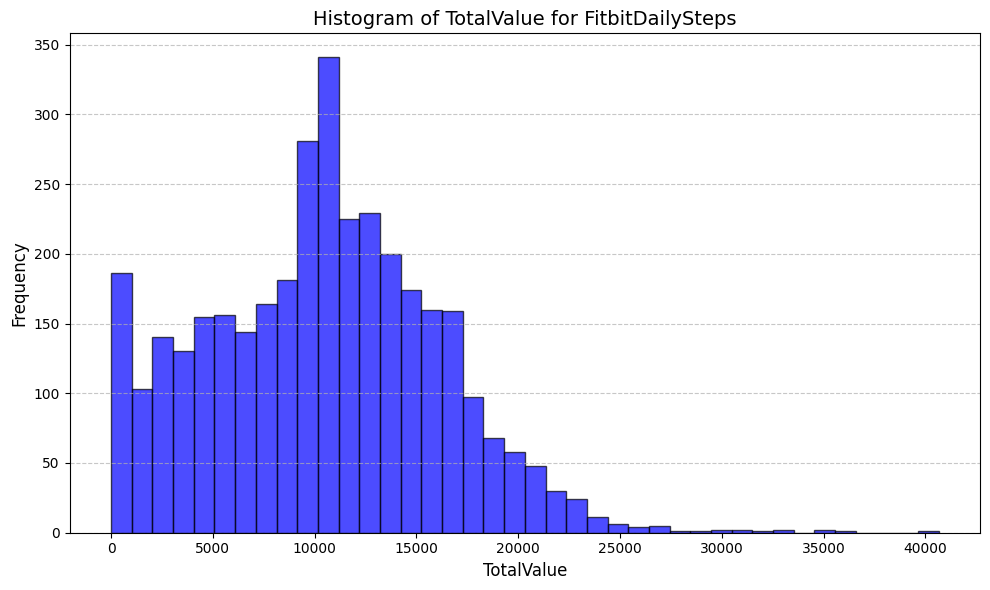

In [24]:
# Filter the dataframe for the 'FitbitDailySteps' category
fitbit_data = df[df['Category'] == 'FitbitDailySteps']
# fitbit_data = df[df['Category'] == 'SelfHelp']
# Plot the histogram for the 'TotalValue' column
plt.figure(figsize=(10, 6))
plt.hist(fitbit_data['TotalValue'], bins=40, color='blue', alpha=0.7, edgecolor='black')

# Add labels and title
plt.title('Histogram of TotalValue for FitbitDailySteps', fontsize=14)
plt.xlabel('TotalValue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### Boxplot

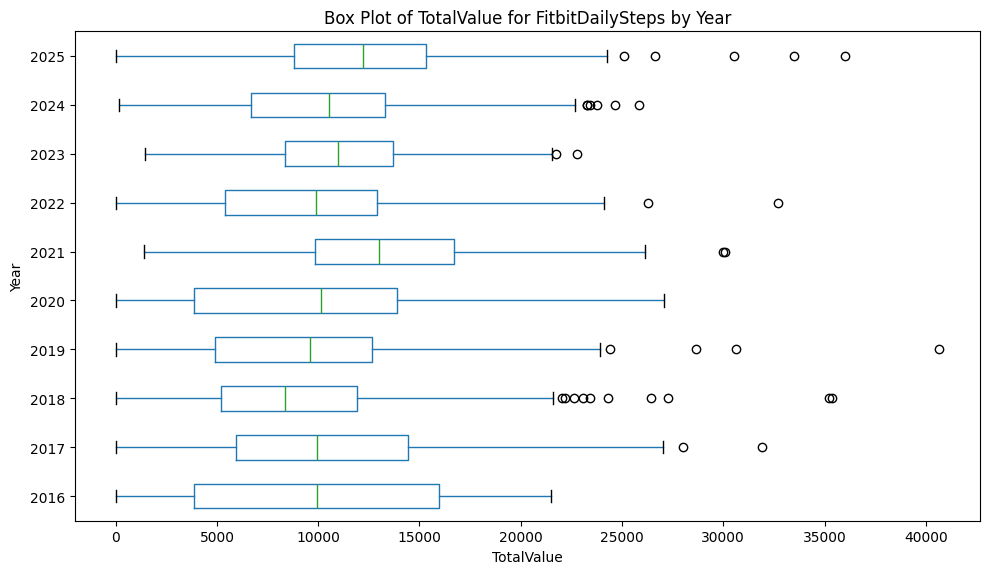

In [25]:
# Filter the dataframe for the 'FitbitDailySteps' category
fitbit_data = df[df['Category'] == 'FitbitDailySteps']
fitbit_data.head()
fitbit_data.boxplot(column='TotalValue', by='Year', figsize=(10, 6), vert=False, grid=False)
plt.title('Box Plot of TotalValue for FitbitDailySteps by Year')
plt.suptitle('')  # Suppress the default title to avoid duplication
plt.xlabel('TotalValue')
plt.ylabel('Year')
plt.tight_layout()
plt.show()